In [15]:
import pickle
anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
data = {}
for i, c in enumerate(anios):
    with open("../input/blog123/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)
        
print(data.keys())

print(data['2008'][1000:1222])

data_combined = {key: [value] for (key, value) in data.items()}

import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

dict_keys(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
 que esos apodos son estándares. Sólo las visitas reconocen el fallo:—Dejá la campera y el portafolio en el rincón blanco —le decía yo a mis amigos cuando venían a tomar la leche.—¿A dónde?—Ahí, en el rincón blanco —y seña


,transcript
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor..."
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ..."
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro..."
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e..."
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco..."
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons..."
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el..."
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij..."
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace..."
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y..."


# # # # # # # # # # # **Limpieza de datos**

In [16]:

import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

data_clean = pd.DataFrame(data_df.transcript.apply(round1))


def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean


data_df.to_pickle("corpus.pkl")

# # # # # # **Bag of Words****

In [18]:

from sklearn.feature_extraction.text import CountVectorizer

with open('../input/spanish/spanish.txt') as f:
    lines = f.read().splitlines()

cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abajo,abananados,abandonaba,abandonado,abandonar,abandonaron,abandoné,abandonó,abanico,abaraja,...,único,únicos,útero,útil,útiles,útimo,českomoravský,české,šeredova,šeredovà
2004,10,0,1,1,0,0,0,0,0,0,...,11,0,0,3,0,1,0,0,0,0
2005,15,0,0,0,0,1,0,0,0,0,...,17,0,3,3,0,0,0,0,0,0
2006,4,0,0,0,0,0,0,0,0,0,...,13,1,0,2,0,0,0,0,0,0
2007,9,0,0,0,1,0,0,0,0,0,...,9,0,0,1,0,0,0,0,0,0
2008,9,0,0,0,0,1,0,1,0,0,...,15,0,0,5,0,0,1,1,1,2
2009,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,2,0,0,0,0,0
2010,8,0,0,0,2,0,0,0,0,0,...,9,0,0,2,0,0,0,0,0,0
2011,7,0,0,0,0,0,0,0,0,0,...,16,4,0,1,0,0,0,0,0,0
2012,8,0,1,0,0,0,0,0,0,1,...,7,1,0,1,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,1,0,...,6,1,0,0,0,0,0,0,0,0


In [25]:
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# # Análisis Exploratorio

In [20]:
import pandas as pd

data = pd.read_pickle('./dtm.pkl')
data = data.transpose()
data.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0


In [21]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict
for anio, top_words in top_dict.items():
    print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

2004
si, alex, vez, lucas, cada, dos, ahora, ser, después, casa, años, siempre, nadie, ver
---
2005
si, dos, vez, años, siempre, ser, vida, tiempo, hace, ahora, entonces, mundo, después, dice
---
2006
si, años, dos, vez, siempre, hace, mundo, ser, ahora, entonces, cada, vida, mismo, casa
---
2007
si, siempre, dos, entonces, vez, años, nunca, ahora, sólo, después, mundo, ser, casa, vida
---
2008
dos, si, años, casa, vez, ahora, después, siempre, entonces, hace, ser, tarde, mismo, tiempo
---
2009
años, si, ahora, casa, vez, después, andrés, dos, ser, vida, hace, tres, entonces, mundo
---
2010
revista, chiri, si, años, orsai, cada, hacer, dos, ahora, ser, hace, vez, casa, lectores
---
2011
orsai, revista, número, lectores, dos, si, vez, chiri, años, ahora, hace, cada, siempre, revistas
---
2012
orsai, dos, cada, si, revista, vez, dijo, chiri, ahora, después, tiempo, mismo, argentina, hace
---
2013
si, dos, años, cada, dijo, papelitos, ve, después, ahora, vez, tres, nunca, tarde, noche
---

# Agregamos Stop Words

In [22]:

from collections import Counter


words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
        
words
Counter(words).most_common()

add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['si',
 'vez',
 'cada',
 'dos',
 'ahora',
 'después',
 'casa',
 'años',
 'hace',
 'nunca',
 'siempre',
 'mundo',
 'día',
 'mismo',
 'ser',
 'vida',
 'tiempo',
 'entonces',
 'hacer',
 'chiri',
 'dijo',
 'tres']

# Actualizamos nuestra Bag of Words

In [26]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


data_clean = pd.read_pickle('./data_clean.pkl')


with open('../input/spanish/spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','andres','todas','sólo','jesús','pablo','pepe']
for pal in more_stop_words:
    stop_words.append(pal)


cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index


import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Nube de Palabras

In [30]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

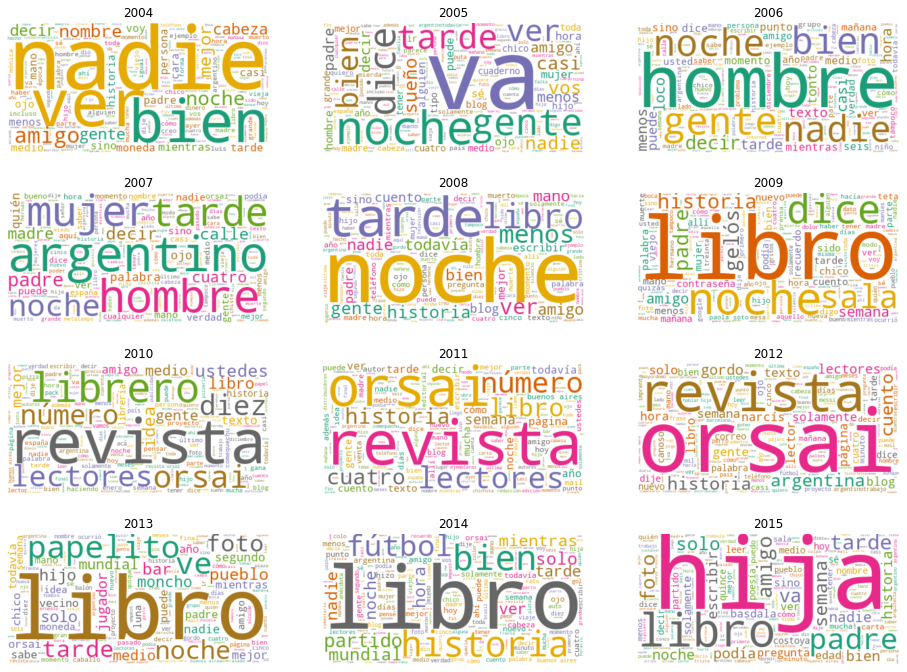

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]

anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']


for index, anio in enumerate(data.columns):
    wc.generate(data_clean.transcript[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
    
plt.show()

# Estadísticas de Palabras por año

In [34]:

unique_list = []
for anio in data.columns:
    uniques = data[anio][0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(anios, unique_list)), columns=['Anio', 'unique_words'])
#data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort = data_words # sin ordenar
data_unique_sort

posts_per_year=[]
try:
  enlaces
except NameError:
    posts_per_year = [50, 27, 18, 50, 42, 22, 50, 33, 31, 17, 33, 13]
else:
    for i in range(len(anios)):
        arts = enlaces[i]
        #arts = arts[0:10] #limito a maximo 10 por año
        print(anios[i],len(arts))
        posts_per_year.append(min(len(arts),MAX_POR_ANIO))
        
total_list = []
for anio in data.columns:
    totals = sum(data[anio])
    total_list.append(totals)
    
data_words['total_words'] = total_list
data_words['posts_per_year'] = posts_per_year
data_words['words_per_posts'] = data_words['total_words'] / data_words['posts_per_year']

#data_wpm_sort = data_words.sort_values(by='words_per_posts')
data_wpm_sort = data_words #sin ordenar
data_wpm_sort

,Anio,unique_words,total_words,posts_per_year,words_per_posts
0,2004,1,16496,50,329.920000
1,2005,1,27293,27,1010.851852
2,2006,1,22215,18,1234.166667
3,2007,1,18462,50,369.240000
4,2008,1,27276,42,649.428571
5,2009,1,7256,22,329.818182
6,2010,1,12930,50,258.600000
7,2011,1,21208,33,642.666667
8,2012,1,9840,31,317.419355
9,2013,1,11695,17,687.941176


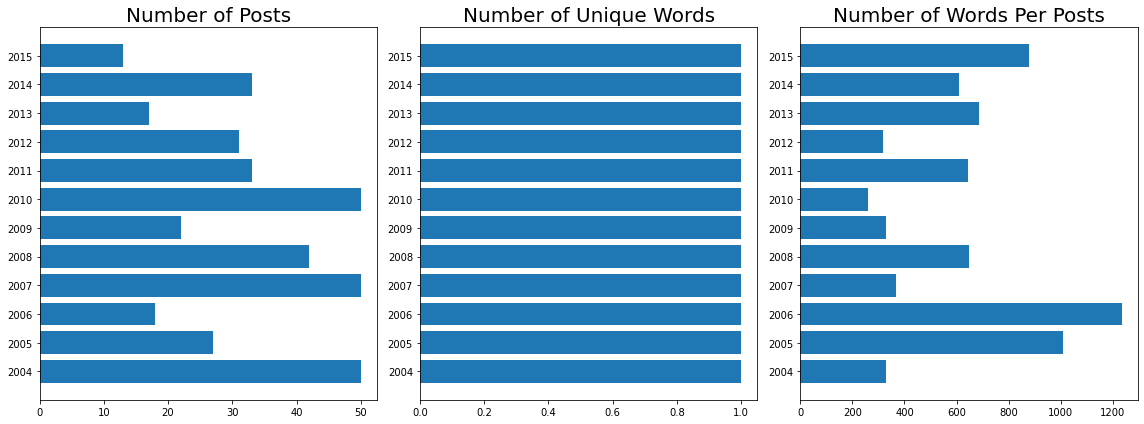

In [116]:

import numpy as np
plt.rcParams['figure.figsize'] = [16, 6]

y_pos = np.arange(len(data_words))

plt.subplot(1, 3, 1)
plt.barh(y_pos,posts_per_year, align='center')
plt.yticks(y_pos, anios)
plt.title('Number of Posts', fontsize=20)


plt.subplot(1, 3, 2)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Anio)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 3, 3)
plt.barh(y_pos, data_wpm_sort.words_per_posts, align='center')
plt.yticks(y_pos, data_wpm_sort.Anio)
plt.title('Number of Words Per Posts', fontsize=20)

plt.tight_layout()
plt.show()

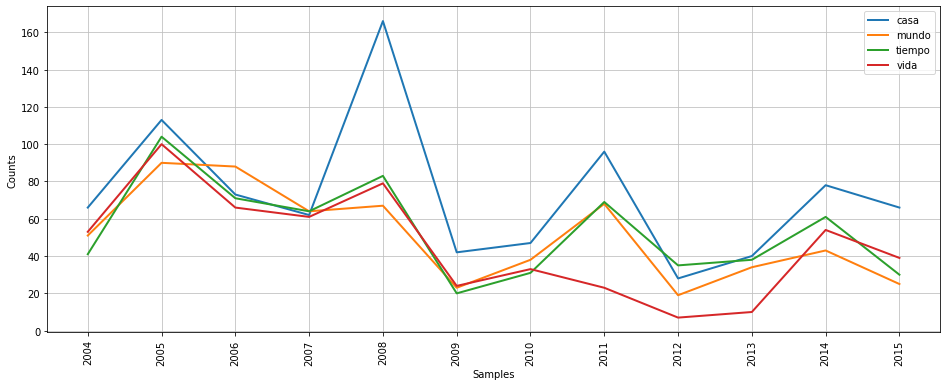

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [38]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = '../input/blog123' 
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')
#wordlists.fileids()
#pals = wordlists.words('2004.txt')

cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in anios
        for w in wordlists.words(genre + '.txt')
        for word in ['casa','mundo','tiempo','vida']
        if w.lower().startswith(word) )
cfd.plot()

# Análisis de Sentimiento

In [124]:
full_names = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

data_df['full_name'] = full_names
data_df
data_df.to_pickle("corpus.pkl")

In [125]:
import pandas as pd
data = pd.read_pickle('./corpus.pkl')
data

,transcript,full_name
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...",2004
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...",2005
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...",2006
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...",2007
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco...",2008
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons...",2009
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el...",2010
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij...",2011
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace...",2012
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y...",2013


In [199]:

from textblob import TextBlob
    
pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

traducir = lambda x: TextBlob(x).translate(to="en")

#data['blob_en'] = data['transcript'].apply(traducir)
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...",2004,0.051472,0.561934
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...",2005,0.007076,0.522230
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...",2006,0.009256,0.524877
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...",2007,0.002266,0.561458
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco...",2008,0.053657,0.524435
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons...",2009,-0.044742,0.462868
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el...",2010,-0.044222,0.505837
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij...",2011,-0.001911,0.505550
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace...",2012,0.034188,0.566447
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y...",2013,-0.079958,0.558140


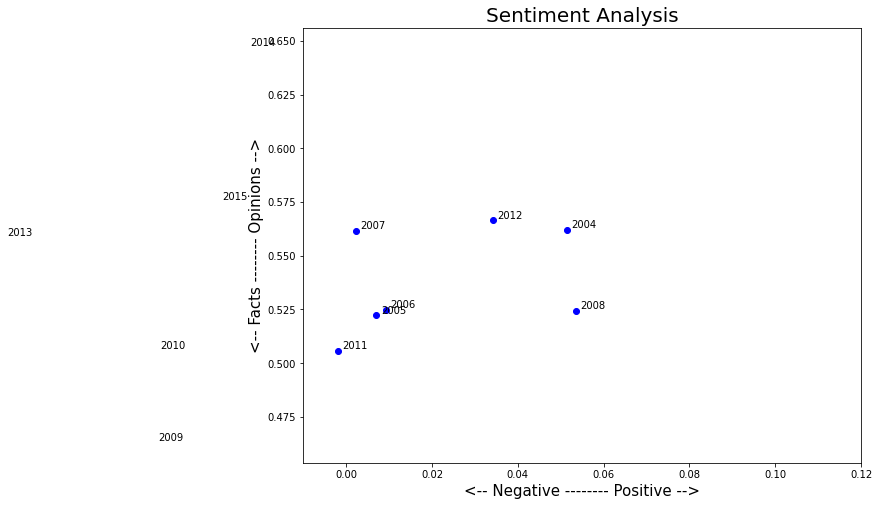

In [127]:

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

In [133]:
list_pieces = []
for t in data.transcript:#transcript:
    split = split_text(t,12)
    list_pieces.append(split)

In [134]:
len(list_pieces)

12

In [135]:
len(list_pieces[0])

12

In [151]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        #polarity_piece.append(TextBlob(p).translate(to="en").sentiment.polarity)
        polarity_piece.append(p.sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

IndentationError: expected an indented block (1043179182.py, line 7)

IndexError: list index out of range

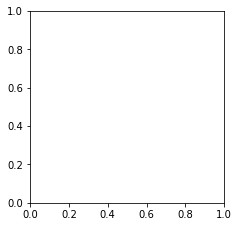

In [152]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, anio in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,12), np.zeros(12))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.45, ymax=.45)
    
plt.show()

# # 6 - Modelado de Temáticas

In [154]:
import pandas as pd
import pickle

data = pd.read_pickle('./dtm_stop.pkl')
data
from gensim import matutils, models
import scipy.sparse


In [155]:
tdm = data.transpose()
tdm.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0


In [156]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [157]:
cv = pickle.load(open("./cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [158]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.002*"gente" + 0.002*"noche" + 0.002*"tarde" + 0.002*"nadie" + 0.002*"revista" + 0.002*"orsai" + 0.002*"bien" + 0.002*"ver" + 0.002*"decir" + 0.002*"menos"'),
 (1,
  '0.003*"orsai" + 0.002*"tarde" + 0.002*"solo" + 0.002*"bien" + 0.002*"argentina" + 0.002*"nadie" + 0.002*"semana" + 0.002*"libro" + 0.002*"mientras" + 0.002*"cuatro"')]

In [160]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.003*"tarde" + 0.003*"noche" + 0.002*"bien" + 0.002*"nadie" + 0.002*"ver" + 0.002*"gente" + 0.002*"menos" + 0.002*"decir" + 0.002*"mujer" + 0.002*"mejor"'),
 (1,
  '0.006*"orsai" + 0.004*"revista" + 0.004*"número" + 0.004*"lectores" + 0.002*"revistas" + 0.002*"cuatro" + 0.002*"semana" + 0.002*"año" + 0.002*"todavía" + 0.002*"gente"'),
 (2,
  '0.005*"revista" + 0.004*"orsai" + 0.002*"gente" + 0.002*"lectores" + 0.002*"decir" + 0.002*"argentina" + 0.002*"casi" + 0.002*"bien" + 0.002*"número" + 0.002*"nadie"')]

In [161]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.006*"orsai" + 0.005*"revista" + 0.005*"número" + 0.005*"lectores" + 0.003*"revistas" + 0.002*"cuatro" + 0.002*"semana" + 0.002*"año" + 0.002*"todavía" + 0.002*"mil"'),
 (1,
  '0.002*"tarde" + 0.002*"solo" + 0.002*"libro" + 0.002*"noche" + 0.002*"hija" + 0.002*"nadie" + 0.002*"libros" + 0.002*"bien" + 0.002*"semana" + 0.002*"mundial"'),
 (2,
  '0.003*"revista" + 0.002*"gente" + 0.002*"orsai" + 0.002*"tarde" + 0.002*"noche" + 0.002*"dice" + 0.002*"bien" + 0.002*"ver" + 0.002*"nadie" + 0.002*"menos"'),
 (3,
  '0.002*"bien" + 0.002*"nadie" + 0.002*"decir" + 0.002*"gente" + 0.002*"noche" + 0.002*"ver" + 0.002*"tarde" + 0.002*"mujer" + 0.002*"menos" + 0.002*"hombre"')]

# Sólo Sustantivos

In [164]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text,language='spanish')
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [165]:
data_clean = pd.read_pickle('./data_clean.pkl')
data_clean

,transcript
2004,ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácor...
2005,nunca en la puta vida me hubiera imaginado que el diario siempre plagado de maremotos y de incendios de discotecas pudiera traer alguna vez una ...
2006,más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros o no firmados pero sí apro...
2007,desde hace días la nina quiere interactuar conmigo todavía es prematuro decir que intenta tener una relación estable pero ya empiezo a oír los e...
2008,de pronto yo estaba en el hogar donde pasé la infancia lo supo primero mi nariz los ojos se acostumbran tarde a la penumbra pero mi olfato reco...
2009,google ha lanzado esta semana latitude un servicio gratuito que permite ubicar mediante el celular a los contactos de la agenda que den su cons...
2010,leo en la prensa económica que entre las varias empresas que tienen pensado salir a bolsa este año se encuentra polaroid y me sorprende leer el...
2011,esto pasó ayer chichita caminaba por una playa desierta en mar azul costa atlántica argentina con su revista y su sombrilla y unos chicos dij...
2012,escribo esto justo cuando el contador llega a dos mil por lo tanto mantenemos el ritmo a pesar de los días de turrones y petardos mientras nace...
2013,menos de once segundos antes cuando el jugador argentino recibe el pase de un compañero el reloj en méxico marca las trece horas doce minutos y...


In [166]:
colname=[]
list_pieces = []
contador=0
for t in data_clean.transcript:
    split = split_text(t,posts_per_year[contador]-7)
    subcont=0
    for p in split:
        list_pieces.append(p)
        colname.append(str(2004+contador)+ "-" + str(subcont))
        subcont=subcont+1
    contador=contador+1
len(list_pieces)

302

In [167]:
data_split = pd.DataFrame(data=list_pieces).transpose()
data_split.columns=colname
data_split2=data_split.transpose()
data_split2.columns = ['transcript']
data_split2

,transcript
2004-0,ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácor...
2004-1,fumaba tocaba la morenita va a la acequia en un acordeón me gustaba oler el papel de la colección robin hood me parecía que la saga de sherloc...
2004-2,ego para resolver uno de sus casos me parecieron ambos tan falsos como la segunda época de tom y jerry cuando usaban moñito y eran amigos cua...
2004-3,ra de sus historias y después otra y después otra hasta que una tarde me vería obligado a arrancar la primera hoja en blanco del cuaderno de mat...
2004-4,del sur argentino imaginará que muchos de sus amigos virtuales la dan por muerta y enterrada ella que con gran dolor debió elegir entre una lu...
...,...
2015-1,rales de sandra sobre los platos rotos que sonaban a veces en el piso de arriba y sobre su llanto lobezno a deshoras que a veces me interrumpía ...
2015-2,ros ni a manos de quién nadie sabe cómo algunos se hicieron dueños del juguete pero un día las tribunas se convirtieron en campos de batalla y...
2015-3,tenido una buena vida yo llevo vistos once y creo que con cuatro más estaría satisfecho me gustaría que empatáramos en quince con mi padre qu...
2015-4,illa que el pobre conferencista y que tendré que dar mis impresiones sobre el futuro del libro durante una hora y escuchar las toses y los carra...


In [168]:
data_nouns = pd.DataFrame(data_split2.transcript.apply(nouns))
data_nouns

,transcript
2004-0,ayer di por finalizada la primera etapa respeto que soy tu madre el recurso herramienta cronológica internet para contar historia costumbrista des...
2004-1,fumaba tocaba la la acequia el papel robin holmes la literatura mundo y que sir arthur conan doyle era el escritor cuando después leí mundo además...
2004-2,ego para resolver tan falsos como la jerry cuando moñito y ya los dibujante sino tipo que trazaba más modernas astuto que podía entera con su lupa...
2004-3,ra después y después hasta que arrancar la primera hoja blanco del cuaderno también tendría que echar luz sobre mis miedos y mis sueños para que l...
2004-4,del sur argentino imaginará que virtuales por muerta y ella que con gran dolor debió elegir entre luna íntima inseparables bien se despidió cuatro...
...,...
2015-1,rales rotos que veces deshoras que veces sueño mis amigos con cariño cogiste la ayer tendría que haberme burlado así casa adquirimos rutinas mis c...
2015-2,ros manos sabe cómo hicieron dueños del juguete pero día las convirtieron campos hablaba alimentar la los jugadores quisieron del juguete se llena...
2015-3,tenido buena vida yo llevo vistos creo que con cuatro más estaría empatáramos quince con mi padre que él viera más mundiales yo más que él pero la...
2015-4,illa que el pobre conferencista y que tendré que dar mis impresiones futuro del libro durante hora y escuchar las carraspeos oyentes minuto quince...


In [169]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

with open('../input/spanish/spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
for pal in more_stop_words:
    stop_words.append(pal)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abajo,abananados,abandonaba,abandonado,abandoné,abandonó,abaratar,abarcaba,abarcar,abastecer,...,únicamente,únicas,único,únicos,útero,útil,útiles,české,šeredova,šeredovà
2004-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2004-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-1,2,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2015-2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2015-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [171]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.003*"bien" + 0.003*"tarde" + 0.002*"decir" + 0.002*"ver" + 0.002*"cómo" + 0.002*"sé" + 0.002*"sino" + 0.002*"año" + 0.002*"dice" + 0.002*"casi"'),
 (1,
  '0.003*"bien" + 0.003*"revista" + 0.003*"tarde" + 0.002*"ver" + 0.002*"decir" + 0.002*"dice" + 0.002*"cuatro" + 0.002*"puede" + 0.002*"tener" + 0.002*"hoy"')]

In [172]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.004*"revista" + 0.003*"bien" + 0.003*"tarde" + 0.002*"decir" + 0.002*"puede" + 0.002*"número" + 0.002*"cinco" + 0.002*"ver" + 0.002*"cuatro" + 0.002*"sino"'),
 (1,
  '0.003*"bien" + 0.003*"tarde" + 0.003*"dice" + 0.003*"ver" + 0.002*"casi" + 0.002*"sé" + 0.002*"decir" + 0.002*"cómo" + 0.002*"tener" + 0.002*"medio"'),
 (2,
  '0.003*"bien" + 0.003*"blog" + 0.002*"sino" + 0.002*"ver" + 0.002*"decir" + 0.002*"tarde" + 0.002*"menos" + 0.002*"hoy" + 0.002*"noche" + 0.002*"historia"')]

In [173]:
# Let's try topics = 4
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.003*"bien" + 0.003*"tarde" + 0.002*"ver" + 0.002*"decir" + 0.002*"madre" + 0.002*"hija" + 0.002*"hombre" + 0.002*"sino" + 0.002*"medio" + 0.002*"sé"'),
 (1,
  '0.003*"tarde" + 0.003*"decir" + 0.002*"bien" + 0.002*"dice" + 0.002*"puede" + 0.002*"ver" + 0.002*"sino" + 0.002*"fútbol" + 0.002*"vos" + 0.002*"tener"'),
 (2,
  '0.004*"bien" + 0.003*"dice" + 0.002*"menos" + 0.002*"hombre" + 0.002*"sino" + 0.002*"ver" + 0.002*"tarde" + 0.002*"año" + 0.002*"cuatro" + 0.002*"casi"'),
 (3,
  '0.004*"revista" + 0.003*"blog" + 0.003*"tarde" + 0.003*"bien" + 0.003*"libro" + 0.002*"ver" + 0.002*"cómo" + 0.002*"decir" + 0.002*"número" + 0.002*"idea"')]

# Parte 6 cambiando los temas

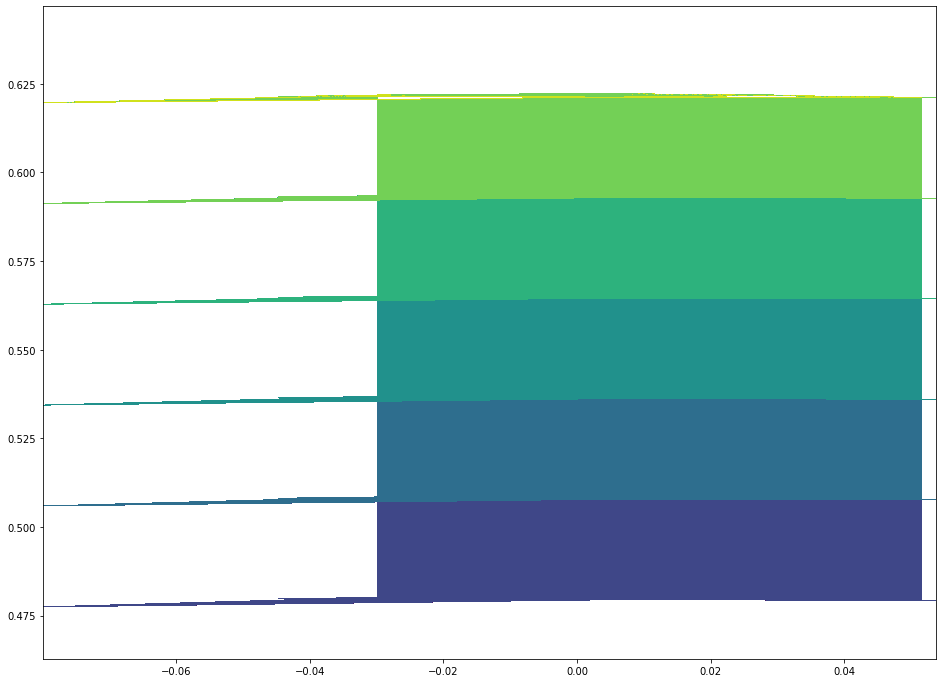

In [204]:
import matplotlib.pyplot as plt

data = pd.read_pickle('./corpus3.pkl')
data
fig, ax = plt.subplots()
x = data['polarity']
y = data['subjectivity']
x, y = np.meshgrid(x, y)
z = np.sqrt(x**2 + 2*y**2)
ax.contourf(x, y, z)
plt.show()

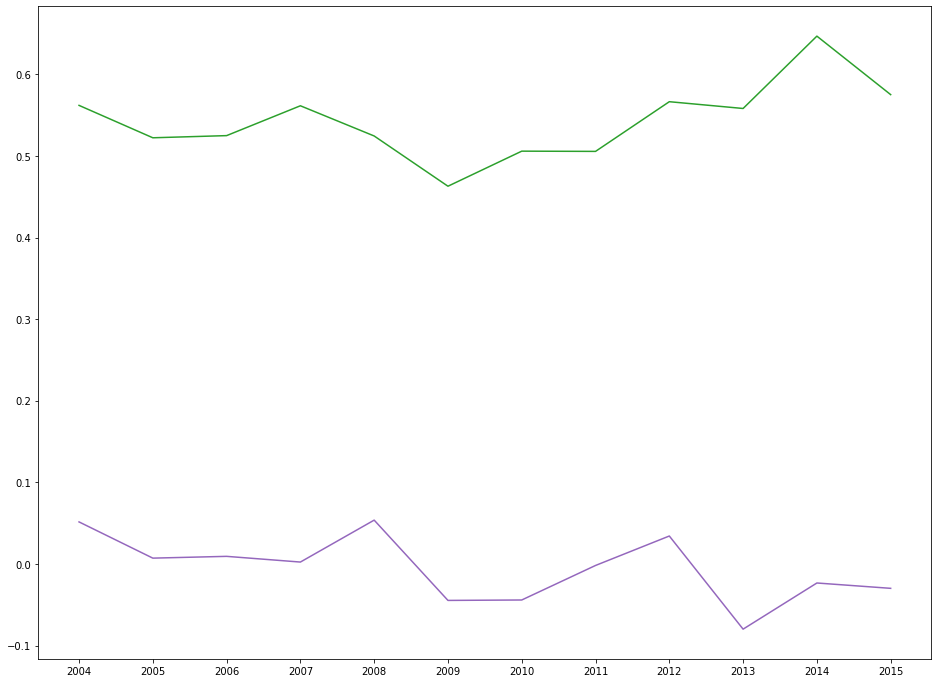

In [205]:
fig, ax = plt.subplots()
anios = data['full_name']
polarity = data['polarity']
subjectivity = data['subjectivity']
ax.plot(anios, polarity, color = 'tab:purple')
ax.plot(anios, subjectivity, color = 'tab:green')
plt.show()